In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random 

In [2]:
model = AbstractModel()
model.i = Set()
model.j = Set(initialize=model.i)
model.R = Param(model.i)

def lowband(model,i):
    return (model.R[i],40)
model.x = Var(model.i, bounds=lowband, within=NonNegativeReals, initialize=random.uniform(0,100))
model.y = Var(model.i, bounds=lowband, within=NonNegativeReals, initialize=random.uniform(0,100))
model.xup = Var( bounds=(1,40), within=NonNegativeReals, initialize=40)
model.yup = Var( bounds=(1,40), within=NonNegativeReals, initialize=40)
model.xh  = Var( bounds=(1,40), within=NonNegativeReals, initialize=40)
model.area= Var( bounds=(1,4000), within=NonNegativeReals, initialize=40)

def rule_eq1(model,i,j):
    if i<j:
        return (model.x[i]-model.x[j])**2+(model.y[i]-model.y[j])**2 >=(model.R[i]+model.R[j])**2
    else:
        return Constraint.Skip;
model.eq1 = Constraint(model.i,model.j,rule=rule_eq1)

def rule_eq2(model,i):
    return model.y[i]*model.xup-model.x[i]*model.yup<=0
model.eq2 = Constraint(model.i,rule=rule_eq2)

def rule_eq3(model,i):
    return model.y[i]*(model.xh-model.xup)+ model.yup*(model.x[i]-model.xh)<=0
model.eq3 = Constraint(model.i,rule=rule_eq3)

def rule_eq4(model,i):
    return (model.y[i]*model.xup-model.x[i]*model.yup)**2 >=(model.xup**2 + model.yup**2)*(model.R[i]**2)
model.eq4 = Constraint(model.i,rule=rule_eq4)

def rule_eq5(model,i):
    return (model.y[i]*(model.xh-model.xup)+ model.yup*(model.x[i]-model.xh))**2>=((model.xh-model.xup)**2 + (model.yup)**2)*(model.R[i]**2)
model.eq5 = Constraint(model.i,rule=rule_eq5)

def rule_eq6(model,i):
    return model.y[i]<=model.yup-model.R[i]
model.eq6 = Constraint(model.i,rule=rule_eq6)

def rule_eq7(model):
    return model.xup<=model.xh
model.eq7 = Constraint(rule=rule_eq7)

model.obj = Objective(expr=0.5*(model.yup*model.xh), sense=minimize)


In [3]:
opt = SolverFactory('Ipopt')
#opt = SolverFactory('gurobi_persistent')
instance = model.create_instance("EX32B.dat")
results = opt.solve(instance) # solves and updates instance

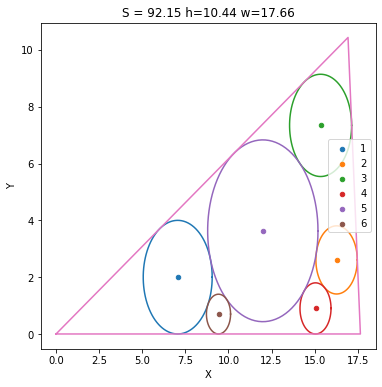

In [4]:
#f, ax = plt.subplots(1, 1)
fig = plt.figure(figsize=(6,6))
theta=np.linspace(0,2*np.pi,100)
for i in instance.i:
    plt.scatter( value(instance.x[i]),value(instance.y[i]),label=str(i),s=20)
    Xc=value(instance.x[i])+value(instance.R[i])*np.cos(theta)
    Yc=value(instance.y[i])+value(instance.R[i])*np.sin(theta)
    plt.plot(Xc,Yc)
Xc=[0, value(instance.xup),value(instance.xh), 0 ]
Yc=[0, value(instance.yup), 0,0]
plt.plot(Xc,Yc)
plt.legend(loc='right')
plt.title('S = '+  str("%5.2f"% value(instance.obj)) + ' h='+ str("%5.2f"% value(instance.yup))+' w='+ str("%5.2f"% value(instance.xh)))
#plt.axis('off')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [5]:
instance.display()
#instance.load(results) # Loading solution into results object
print(results.solver.status)


Model unknown

  Variables:
    x : Size=6, Index=i
        Key : Lower : Value              : Upper : Fixed : Stale : Domain
          1 :     2 :  7.057216132739347 :    40 : False : False : NonNegativeReals
          2 :   1.2 :  16.27295614691967 :    40 : False : False : NonNegativeReals
          3 :   1.8 : 15.345927780551198 :    40 : False : False : NonNegativeReals
          4 :   0.9 : 15.050397333135482 :    40 : False : False : NonNegativeReals
          5 :   3.2 :  11.99414682078716 :    40 : False : False : NonNegativeReals
          6 :   0.7 :   9.42364803685153 :    40 : False : False : NonNegativeReals
    y : Size=6, Index=i
        Key : Lower : Value              : Upper : Fixed : Stale : Domain
          1 :     2 :                2.0 :    40 : False : False : NonNegativeReals
          2 :   1.2 : 2.6074395682533744 :    40 : False : False : NonNegativeReals
          3 :   1.8 :  7.343205297575072 :    40 : False : False : NonNegativeReals
          4 :   0.9 